# Review: Programming Exercise 08

## N-Queens Problem
slides in Algorithm11(Backtracking)
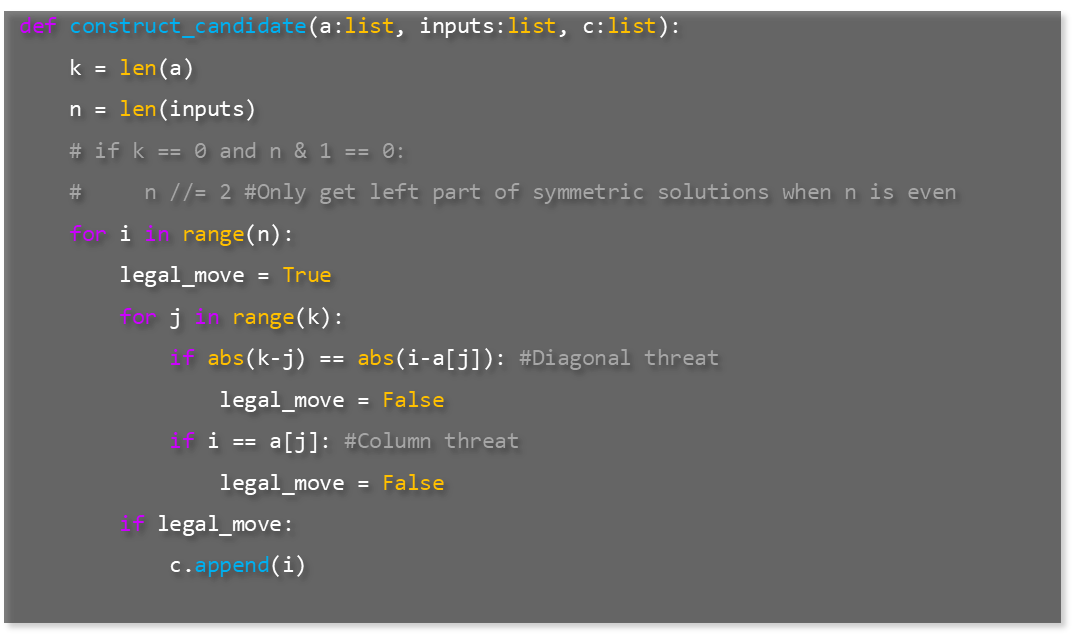

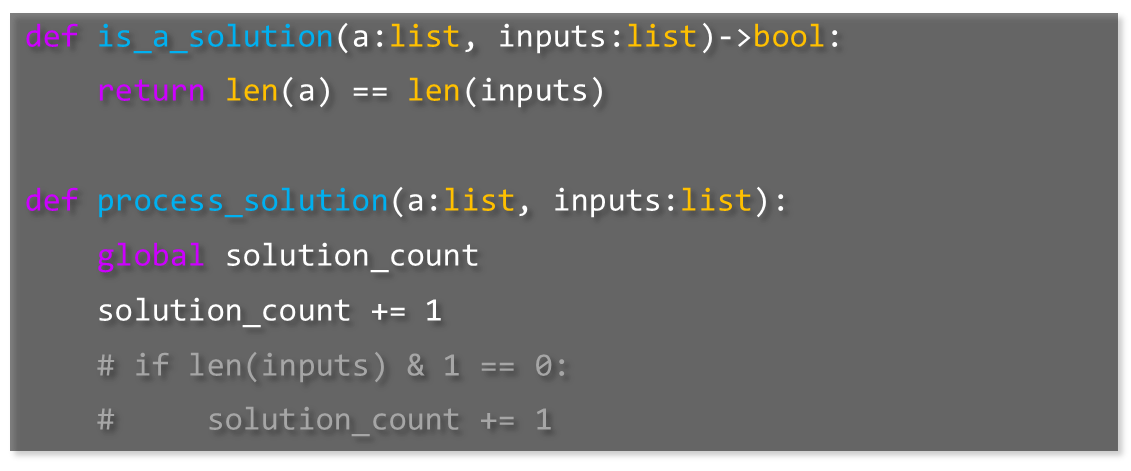

In [3]:
def do_backtrack(a:list, inputs:list):
    c = []
    if (is_a_solution(a, inputs)):
        process_solution(a, inputs)
    else:
        construct_candidate(a, inputs, c)
        for i in c:
            a.append(i)
            do_backtrack(a, inputs)
            a.pop()

In [4]:
def construct_candidate(a:list, inputs:list, c:list):
    k = len(a)
    n = len(inputs)
    if k == 0 and n & 1 == 0:
        n //= 2 #Only get left part of symmetric solutions when n is even
    for i in range(n):
        legal_move = True
        for j in range(k):
            if abs(k-j) == abs(i-a[j]): #Diagonal threat
                legal_move = False
            if i == a[j]: #Column threat
                legal_move = False
        if legal_move:
            c.append(i)

def is_a_solution(a:list, inputs:list)->bool:
    return len(a) == len(inputs)

def process_solution(a:list, inputs:list):
    global solution_count
    solution_count += 1
    if len(inputs) & 1 == 0:
        solution_count += 1

In [ ]:
solution_count = 0
n = 8
do_backtrack([],[0]*n)
print(solution_count)
#92
solution_count = 0
n = 4
do_backtrack([],[0]*n)
print(solution_count)
#2
solution_count = 0
n = 6
do_backtrack([],[0]*n)
print(solution_count)
#4
solution_count = 0
n = 11
do_backtrack([],[0]*n)
print(solution_count)
#2680

In [ ]:
n = 8
solution_count = 0
%timeit solution_count = 0; do_backtrack([],[0]*n)
do_backtrack([],[0]*n)
print(solution_count)
#14200

In [ ]:
n = 8
solution_count = 0
%timeit solution_count = 0; do_backtrack([],[0]*n)
do_backtrack([],[0]*n)
print(solution_count)
#14200

## Implement a Sudoku Solver

In [8]:
def do_backtrack(a:list, inputs:list):
    c = []
    if (is_a_solution(a, inputs)):
        process_solution(a, inputs)
    else:
        construct_candidate(a, inputs, c)
        for i in c:
            a.append(i)
            do_backtrack(a, inputs)
            a.pop()

def process_solution(a:list, inputs:list):
    global solution
    solution = [x[:] for x in inputs.copy()]
    index, n = 0, len(inputs)
    for i in range(n):
        for j in range(n):
            if solution[i][j] == 0 and index < len(a):
                solution[i][j] = a[index]
                index += 1

import math
def is_valid_sudoku(partial_assignment:list)->bool:
    #Return True if subarray partial_assignment[start_row:end_row][start_col:end_coL]
    #contains any duplicates in {1, 2, ..., len(partial_assignnent)};
    #otherwise return False.
    def has_duplicate(block):
        block = list(filter(lambda x: x!=0, block))
        return len(block) != len(set(block))
    n = len(partial_assignment)
    #Check row and column constraints.
    if any(has_duplicate([partial_assignment[i][j] for j in range(n)])
           or has_duplicate([partial_assignment[j][i] for j in range(n)])
           for i in range(n)):
        return False
    #Check region constraints.
    region_size = int(math.sqrt(n))
    return all(not has_duplicate([
        partial_assignment[a][b]
        for a in range(region_size * I, region_size * (I+1))
        for b in range(region_size * J, region_size * (J+1))])
        for I in range(region_size) for J in range(region_size))

def check_solution(sol:list, init:list)->str:
    n = len(sol)
    #Check empty slots
    for r in range(n):
        for c in range(n):
            if sol[r][c] == 0:
                return "There has empty slot(s) in solution."
    #Check valid or not
    if (sol == [] or not is_valid_sudoku(sol)):
        return "It's not a valid solution!"
    #Check solving from init grid
    for r in range(n):
        for c in range(n):
            if init[r][c] != 0 and sol[r][c] != init[r][c]:
                return "It's not solved from initial grid."
    return "pass!"

In [ ]:
sudoku = [[0, 3, 2, 0, 0, 0, 8, 0, 4], [8, 0, 0, 2, 0, 0, 0, 7, 0], [0, 1, 7, 0, 0, 5, 9, 0, 6], [5, 8, 0, 0, 2, 0, 0, 3, 0], [0, 0, 6, 0, 4, 0, 7, 0, 0], [0, 0, 4, 9, 1, 3, 0, 6, 0], [0, 0, 0, 7, 3, 0, 2, 0, 0], [0, 5, 9, 0, 0, 0, 0, 0, 1], [1, 0, 0, 8, 0, 9, 0, 0, 0]]
n = len(sudoku)
empty_rows = [len(list(filter(lambda x: x == 0, row))) for row in sudoku] #各row的空格數量
empty_count = sum(len(list(filter(lambda x: x == 0, row))) for row in sudoku) #總空格數
print(empty_rows, empty_count)
empty_rows2 = [len([x for x in row if x == 0]) for row in sudoku] #各row的空格數量
empty_count2 = sum(len([x for x in row if x == 0]) for row in sudoku) #總空格數
print(empty_rows2, empty_count2)

In [10]:
def is_a_solution(a:list, inputs:list)->bool:
    #empty = 0 #count all empty slots(zero) in inputs
    #n = len(inputs)
    #for i in range(n):
    #    for j in range(n):
    #        if()#判斷input[i][j]是否為0後累加empty
    return len(a) == sum(len([x for x in row if x == 0]) for row in inputs) #need fix: 回傳a的長度是否為累加後的空格數或是改用上面的直接加總結果

def fill_answer(a:list, inputs:list)->tuple:
    partial = [x[:] for x in inputs.copy()] # partial solution
    index = 0
    n = len(inputs)
    for i in range(n):
        for j in range(n):
            if partial[i][j] == 0:
                if index < len(a):
                    partial[i][j] = a[index] # fill in answer a into the inputs
                    index += 1
                else:
                    return i,j,partial  #此時partial已填好來自a的部份解且i,j就是下一個空格的位置

def construct_candidate(a:list, inputs:list, c:list):
    i,j,partial = fill_answer(a, inputs)
    for n in range(1,10):
        # 將部分解的下一個空格填入數值n
        partial[i][j] = n
        if is_valid_sudoku(partial): #判斷是否為合法sudoku
            c.append(n) # need fix: 將數值n加入candidate list

In [ ]:
solution = []
sudoku = [[0, 3, 2, 0, 0, 0, 8, 0, 4], [8, 0, 0, 2, 0, 0, 0, 7, 0], [0, 1, 7, 0, 0, 5, 9, 0, 6], [5, 8, 0, 0, 2, 0, 0, 3, 0], [0, 0, 6, 0, 4, 0, 7, 0, 0], [0, 0, 4, 9, 1, 3, 0, 6, 0], [0, 0, 0, 7, 3, 0, 2, 0, 0], [0, 5, 9, 0, 0, 0, 0, 0, 1], [1, 0, 0, 8, 0, 9, 0, 0, 0]]
do_backtrack([],sudoku)
print(check_solution(solution, sudoku))
print(solution)
#pass!
#[[9, 3, 2, 1, 7, 6, 8, 5, 4], [8, 6, 5, 2, 9, 4, 1, 7, 3], [4, 1, 7, 3, 8, 5, 9, 2, 6], [5, 8, 1, 6, 2, 7, 4, 3, 9], [3, 9, 6, 5, 4, 8, 7, 1, 2], [2, 7, 4, 9, 1, 3, 5, 6, 8], [6, 4, 8, 7, 3, 1, 2, 9, 5], [7, 5, 9, 4, 6, 2, 3, 8, 1], [1, 2, 3, 8, 5, 9, 6, 4, 7]]
solution = []
sudoku = [[0, 5, 7, 0, 2, 3, 0, 1, 6], [0, 0, 0, 7, 0, 9, 5, 0, 0], [0, 0, 2, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0], [3, 0, 0, 8, 0, 6, 4, 0, 9], [2, 0, 9, 0, 0, 0, 0, 0, 7], [0, 2, 0, 9, 0, 1, 0, 0, 5], [9, 0, 0, 3, 6, 0, 8, 0, 1], [0, 0, 6, 0, 7, 0, 0, 0, 4]]
do_backtrack([],sudoku)
print(check_solution(solution, sudoku))
print(solution)
#pass!
#[[8, 5, 7, 4, 2, 3, 9, 1, 6], [6, 1, 3, 7, 8, 9, 5, 4, 2], [4, 9, 2, 6, 1, 5, 7, 8, 3], [5, 6, 4, 2, 9, 7, 1, 3, 8], [3, 7, 1, 8, 5, 6, 4, 2, 9], [2, 8, 9, 1, 3, 4, 6, 5, 7], [7, 2, 8, 9, 4, 1, 3, 6, 5], [9, 4, 5, 3, 6, 2, 8, 7, 1], [1, 3, 6, 5, 7, 8, 2, 9, 4]]
solution = []
sudoku = [[8, 0, 0, 3, 2, 0, 0, 7, 0], [0, 5, 7, 8, 0, 0, 9, 0, 0], [0, 9, 0, 0, 0, 1, 0, 4, 0], [0, 7, 8, 0, 1, 0, 6, 0, 3], [2, 0, 0, 0, 7, 0, 1, 0, 0], [9, 0, 4, 5, 0, 3, 0, 0, 0], [0, 0, 5, 6, 0, 0, 0, 0, 9], [0, 6, 0, 0, 8, 0, 7, 0, 1], [0, 0, 3, 0, 0, 4, 8, 0, 0]]
do_backtrack([],sudoku)
print(check_solution(solution, sudoku))
print(solution)
#pass!
#[[8, 4, 1, 3, 2, 9, 5, 7, 6], [3, 5, 7, 8, 4, 6, 9, 1, 2], [6, 9, 2, 7, 5, 1, 3, 4, 8], [5, 7, 8, 4, 1, 2, 6, 9, 3], [2, 3, 6, 9, 7, 8, 1, 5, 4], [9, 1, 4, 5, 6, 3, 2, 8, 7], [1, 8, 5, 6, 3, 7, 4, 2, 9], [4, 6, 9, 2, 8, 5, 7, 3, 1], [7, 2, 3, 1, 9, 4, 8, 6, 5]]
solution = []
sudoku = [[8, 9, 0, 7, 0, 4, 0, 3, 0], [7, 2, 0, 9, 0, 0, 5, 0, 0], [0, 0, 5, 0, 3, 8, 0, 0, 1], [0, 0, 0, 8, 0, 0, 0, 2, 0], [1, 0, 0, 0, 0, 6, 0, 4, 8], [5, 0, 4, 0, 2, 3, 6, 7, 0], [0, 0, 0, 0, 8, 0, 9, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 3, 6, 0, 1, 0, 0, 5, 0]]
do_backtrack([],sudoku)
print(check_solution(solution, sudoku))
print(solution)
#pass!
#[[8, 9, 1, 7, 5, 4, 2, 3, 6], [7, 2, 3, 9, 6, 1, 5, 8, 4], [6, 4, 5, 2, 3, 8, 7, 9, 1], [3, 6, 9, 8, 4, 7, 1, 2, 5], [1, 7, 2, 5, 9, 6, 3, 4, 8], [5, 8, 4, 1, 2, 3, 6, 7, 9], [4, 1, 7, 3, 8, 5, 9, 6, 2], [2, 5, 8, 6, 7, 9, 4, 1, 3], [9, 3, 6, 4, 1, 2, 8, 5, 7]]
solution = []
sudoku = [[0, 0, 0, 2, 0, 0, 4, 0, 8], [4, 0, 7, 1, 9, 0, 0, 0, 5], [0, 5, 0, 0, 7, 8, 6, 1, 0], [9, 3, 0, 0, 5, 0, 0, 0, 0], [7, 0, 8, 0, 0, 0, 0, 4, 3], [0, 0, 0, 0, 6, 0, 0, 0, 2], [0, 0, 0, 0, 4, 0, 0, 2, 0], [3, 2, 0, 0, 0, 9, 0, 0, 1], [0, 1, 6, 3, 0, 0, 0, 8, 0]]
do_backtrack([],sudoku)
print(check_solution(solution, sudoku))
print(solution)
#pass!
#[[6, 9, 1, 2, 3, 5, 4, 7, 8], [4, 8, 7, 1, 9, 6, 2, 3, 5], [2, 5, 3, 4, 7, 8, 6, 1, 9], [9, 3, 2, 8, 5, 4, 1, 6, 7], [7, 6, 8, 9, 1, 2, 5, 4, 3], [1, 4, 5, 7, 6, 3, 8, 9, 2], [8, 7, 9, 5, 4, 1, 3, 2, 6], [3, 2, 4, 6, 8, 9, 7, 5, 1], [5, 1, 6, 3, 2, 7, 9, 8, 4]]

# Class start here !!! 

# Fibonacci

In [1]:
# recursive version
def fib_r(n:int)->int:
  if n < 2:
    return n
  return fib_r(n-1)+fib_r(n-2)

In [2]:
for i in range(11):
  print(fib_r(i), end=" ")
print()

0 1 1 2 3 5 8 13 21 34 55 


In [ ]:
%%timeit
for i in range(11):
  fib_r(i)

In [11]:
# cache version ; use space to save it 
def fib_c(n:int)->int:
  F = [None]*(n+1)
  F[0] = 0   # f(0) = 0 
  if n > 0:
    F[1] = 1   # f(1) = 1 

  def fib(n:int)->int:
    if F[n] == None:   # check if F[n] is not calculated yet 
      F[n] = fib(n-1) + fib(n-2)
      print(f"F[{n}] = {F[n]}")
    return F[n]
  
  result = fib(n)
  print("final result: ", result)
  print("final cache:" , F)
  return result

In [12]:
for i in range(11):
  print(fib_c(i), end=" ")
print()

final result:  0
final cache: [0]
0 final result:  1
final cache: [0, 1]
1 F[2] = 1
final result:  1
final cache: [0, 1, 1]
1 F[2] = 1
F[3] = 2
final result:  2
final cache: [0, 1, 1, 2]
2 F[2] = 1
F[3] = 2
F[4] = 3
final result:  3
final cache: [0, 1, 1, 2, 3]
3 F[2] = 1
F[3] = 2
F[4] = 3
F[5] = 5
final result:  5
final cache: [0, 1, 1, 2, 3, 5]
5 F[2] = 1
F[3] = 2
F[4] = 3
F[5] = 5
F[6] = 8
final result:  8
final cache: [0, 1, 1, 2, 3, 5, 8]
8 F[2] = 1
F[3] = 2
F[4] = 3
F[5] = 5
F[6] = 8
F[7] = 13
final result:  13
final cache: [0, 1, 1, 2, 3, 5, 8, 13]
13 F[2] = 1
F[3] = 2
F[4] = 3
F[5] = 5
F[6] = 8
F[7] = 13
F[8] = 21
final result:  21
final cache: [0, 1, 1, 2, 3, 5, 8, 13, 21]
21 F[2] = 1
F[3] = 2
F[4] = 3
F[5] = 5
F[6] = 8
F[7] = 13
F[8] = 21
F[9] = 34
final result:  34
final cache: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
34 F[2] = 1
F[3] = 2
F[4] = 3
F[5] = 5
F[6] = 8
F[7] = 13
F[8] = 21
F[9] = 34
F[10] = 55
final result:  55
final cache: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
55 


In [ ]:
%%timeit
for i in range(11):
  fib_c(i)

In [13]:
# Dynamic Programming version
def fib_d(n:int)->int:
  F = [None]*(n+1)
  F[0] = 0
  if n > 0:
    F[1] = 1

  for i in range(2, n+1):
    F[i] = F[i-1] + F[i-2]

  return F[n]

In [14]:
for i in range(11):
  print(fib_d(i), end=" ")
print()

0 1 1 2 3 5 8 13 21 34 55 


In [ ]:
%%timeit
for i in range(11):
  fib_d(i)

In [ ]:
29.5/8.98, 23.5/8.98

# Binomial Coefficient

In [15]:
def binomial_coefficient_r(n:int, k:int)->int:
    #Compute n choose k
    if n == k or k == 0:
        return 1
    return binomial_coefficient_r(n-1, k-1) + binomial_coefficient_r(n-1, k)

In [16]:
binomial_coefficient_r(10,5)

252

In [ ]:
%timeit binomial_coefficient_r(10,5)

init matrix : for down algo 

In [19]:
n = 5 
[[1]*(n+1)]*(n+1)

[[1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]

In [20]:
n = 5 
bc = [x[:] for x in [[1]*(n+1)]*(n+1)]  
bc

[[1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]

In [23]:
# cache version 

def binomial_coefficient(n:int, k:int)->int:
    bc = [x[:] for x in [[1]*(n+1)]*(n+1)]  # Table of binomial coefficients
    # bc = [[1]*(n+1)]*(n+1)
    for i in range(2, n+1):
        for j in range(1, i):
            bc[i][j] = bc[i-1][j-1] + bc[i-1][j]
    print(bc)
    return bc[n][k]

In [24]:
binomial_coefficient(5,2)

[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 2, 1, 1, 1, 1], [1, 3, 3, 1, 1, 1], [1, 4, 6, 4, 1, 1], [1, 5, 10, 10, 5, 1]]


10

In [ ]:
%timeit binomial_coefficient(10,5)

In [ ]:
42.4/10.2

# String Compare

In [2]:
def string_compare_r(s:str, t:str, i:int, j:int)->int:
    opt = {}
    # ending condition 
    if i < 0:   # i : first str's index  --> s
        return j+1
    if j < 0:   # j : second str's index --> t 
        return i+1 
    opt['MATCH'] = string_compare_r(s,t,i-1,j-1) + (0 if s[i] == t[j] else 1)
    opt['INSERT'] = string_compare_r(s,t,i,j-1) + 1
    opt['DELETE'] = string_compare_r(s,t,i-1,j) + 1
    print(opt)
    return min(opt.values())

In [3]:
# s = 'shot'
# t = 'sport'
# s = 'thou-shalt'
# t = 'you-should'
s = 'shall'
t = 'should'
string_compare_r(s,t,len(s)-1,len(t)-1)

{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 1, 'DELETE': 3}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 3, 'DELETE': 1}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 1, 'DELETE': 3}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 1, 'DELETE': 3}
{'MATCH': 3, 'INSERT': 2, 'DELETE': 4}
{'MATCH': 2, 'INSERT': 1, 'DELETE': 3}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 3, 'DELETE': 1}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 1, 'DELETE': 3}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 3, 'DELETE': 1}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 3, 'DELETE': 1}
{'MATCH': 3, 'INSERT': 4, 'DELETE': 2}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 0, 'INSERT': 2, 'DELETE': 2}
{'MATCH': 2, 'INSERT': 3,

3

In [ ]:
%timeit string_compare_r(s,t,len(s)-1,len(t)-1)

### DP Version 
- 建立矩陣 m ，避免重複計算 

In [5]:
class Cell:
    def __init__(self):
        self.cost = 0 # Cost of reaching this cell
        self.parent = -1 #Parent opt
    def __str__(self):
        return f"{self.cost}[{str(self.parent)[0]}]"

def init_matrix(m:list):
    for i in range(len(m)):
        for j in range(len(m[0])):
            m[i][j] = Cell()
            if i == 0: #Row init
                m[0][j].cost = j
                if j > 0:
                    m[0][j].parent = 'INSERT'
        m[i][0].cost = i #Column init
        if i > 0:
            m[i][0].parent = 'DELETE'

def reconstruct_path(m:list, s:str, t:str, i:int, j:int):
    if m[i][j].parent == -1:
        return
    elif m[i][j].parent == 'MATCH':
        yield from reconstruct_path(m, s, t, i-1, j-1)
        yield ('M' if s[i-1] == t[j-1] else 'S')
    elif m[i][j].parent == 'INSERT':
        yield from reconstruct_path(m, s, t, i, j-1)
        yield 'I'
    elif m[i][j].parent == 'DELETE':
        yield from reconstruct_path(m, s, t, i-1, j)
        yield 'D'

def string_compare(s:str, t:str)->int:
    opt = {}
    init_matrix(m)  # func 
    for i in range(1, len(s)+1):
        for j in range(1, len(t)+1):
            opt['MATCH'] = m[i-1][j-1].cost + (0 if s[i-1] == t[j-1] else 1)
            opt['INSERT'] = m[i][j-1].cost + 1
            opt['DELETE'] = m[i-1][j].cost + 1
            m[i][j].cost = min(opt.values())
            m[i][j].parent = min(opt, key=opt.get) #取出得到最小opt值的key
    return m[len(s)][len(t)].cost

In [6]:
# e.g.1 

s = 'shot'
t = 'sport'
#s = 'thou-shalt'
#t = 'you-should'
#s = 'shall'
#t = 'should'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

string_compare(s,t)

2

In [ ]:
%timeit string_compare(s,t)

In [7]:
# e.g. 2 
# s = 'thou-shalt'
# t = 'you-should'
s = 'shall'
t = 'should'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

string_compare(s,t)

3

In [8]:
for row in m:
    print(" ".join(map(str, row)))
print(",".join(reconstruct_path(m, s, t, len(s), len(t))))

0[-] 1[I] 2[I] 3[I] 4[I] 5[I] 6[I]
1[D] 0[M] 1[I] 2[I] 3[I] 4[I] 5[I]
2[D] 1[D] 0[M] 1[I] 2[I] 3[I] 4[I]
3[D] 2[D] 1[D] 1[M] 2[M] 3[M] 4[M]
4[D] 3[D] 2[D] 2[M] 2[M] 2[M] 3[I]
5[D] 4[D] 3[D] 3[M] 3[M] 2[M] 3[M]
M,M,I,S,M,S


s = 'shall'
t = 'should'

explanation of result : 
- cost[parent]
- I : inserted, D: deleted, M : matched, S: sub 
- first row : from emp to t's cost 
- first col : from s to emp's cost 
- all index : 從 s 的錢 i 到 t 的錢 j 的最小編輯距離 
- MMISMS : from s to t 

In [9]:
s = 'shall'
t = 'should'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

string_compare(s,t)
for row in m:
    print(" ".join(map(str, row)))
print(",".join(reconstruct_path(m, s, t, len(s), len(t))))

0[-] 1[I] 2[I] 3[I] 4[I] 5[I] 6[I]
1[D] 0[M] 1[I] 2[I] 3[I] 4[I] 5[I]
2[D] 1[D] 0[M] 1[I] 2[I] 3[I] 4[I]
3[D] 2[D] 1[D] 1[M] 2[M] 3[M] 4[M]
4[D] 3[D] 2[D] 2[M] 2[M] 2[M] 3[I]
5[D] 4[D] 3[D] 3[M] 3[M] 2[M] 3[M]
M,M,I,S,M,S
